In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Para criação de gráficos de barras

In [27]:
df = pd.read_excel('tabela.xlsx')
df = df.rename(columns={
    "Localidade":"Cidade",
    "Total de trabalhadores (curso superior, mestres e doutores) (número)":"Total de trabalhadores",
    "Total de trabalhadores doutores (número)":"Trabalhadores doutores",
    "Total de trabalhadores mestres (número)":"Trabalhadores mestres",
    "Total de trabalhadores com curso superior completo  (número)":"Trabalhadores com ensino superior"
    })
df.head()

,Cidade,Ano,Total de trabalhadores,Trabalhadores doutores,Trabalhadores mestres,Trabalhadores com ensino superior
0,Aparecida de Goiânia,2009,7633,12,43,7578
1,Aparecida de Goiânia,2010,8616,4,37,8575
2,Aparecida de Goiânia,2011,9296,11,55,9230
3,Aparecida de Goiânia,2012,9995,9,78,9908
4,Aparecida de Goiânia,2013,14001,15,94,13892


In [28]:
df.isnull().sum()

Cidade                               0
Ano                                  0
Total de trabalhadores               0
Trabalhadores doutores               0
Trabalhadores mestres                0
Trabalhadores com ensino superior    0
dtype: int64

<h2>Análise dos dados</h2>
<p>Para essa análise, foram comparados os valores percentuais dos trabalhadores com os diferentes níveis acadêmicos em relação ao total por cidade.</p>

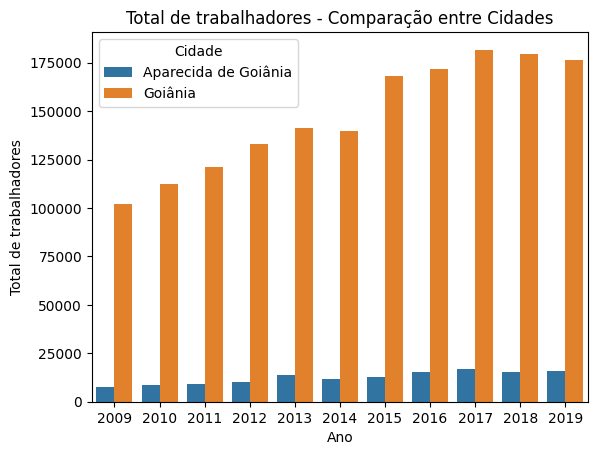

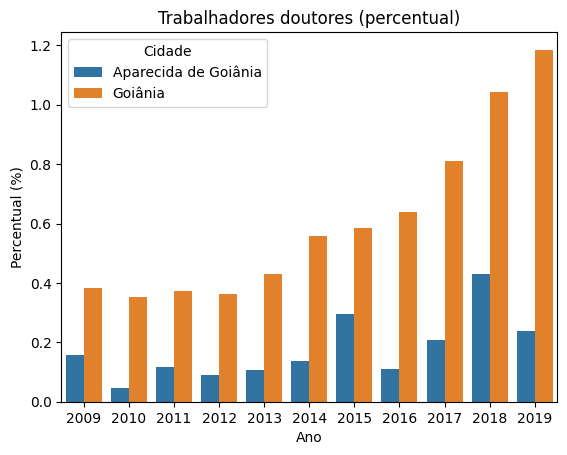

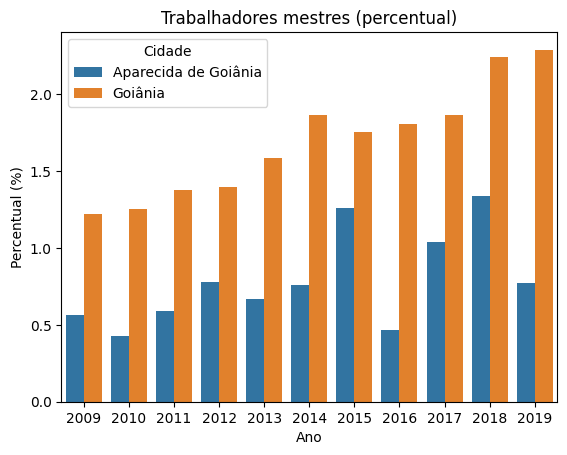

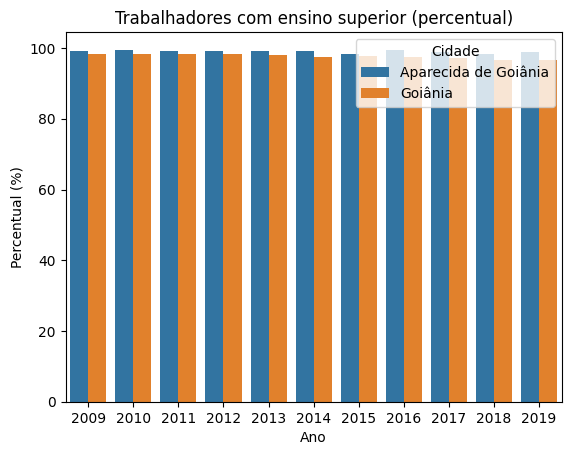

In [ ]:
categorias = ['Total de trabalhadores', 'Trabalhadores doutores', 
              'Trabalhadores mestres', 'Trabalhadores com ensino superior']

cidade_ano = df.groupby(['Cidade', 'Ano']).sum().reset_index()

categoria_data = cidade_ano[['Cidade', 'Ano', 'Total de trabalhadores', 'Trabalhadores doutores', 
                            'Trabalhadores mestres', 'Trabalhadores com ensino superior']]

for i, categoria in enumerate(categorias):

    if categoria == 'Total de trabalhadores':
        # Valor absoluto
        sns.barplot(data=categoria_data, x='Ano', y=categoria, hue='Cidade', errorbar=None)
        plt.title(f'{categoria} - Comparação entre Cidades')
    else:
        # Para as outras categorias, calcular o percentual em relação ao Total de Trabalhadores
        categoria_data['Percentual'] = categoria_data[categoria] / categoria_data['Total de trabalhadores'] * 100
        sns.barplot(data=categoria_data, x='Ano', y='Percentual', hue='Cidade', errorbar=None)
        plt.title(f'{categoria} (percentual)')
        plt.ylabel('Percentual (%)')

        
    plt.xlabel('Ano')
    plt.legend(title='Cidade')

    plt.show()